<a href="https://colab.research.google.com/github/seohii66/DataMining/blob/main/2012638_%EA%B9%80%EC%84%9C%ED%9D%AC_IT%EB%B9%84%EC%A6%88%EB%8B%88%EC%8A%A4%ED%98%81%EC%8B%A0_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **개요**
 - AST, ALT,GAMMA_GTP가 어떤 요소의 영향을 많이 받는지
 - 혈압이 높은 이들이 콜레스테롤의 영향을 받는지, 콜레스테롤에 영향을 미치는 요소는 무엇인지
 - BMI 지수가 콜레스테롤과 관련이 있는지
 에 집중해서 데이터를 시각화하고 분석해보려고 한다.

## **데이터 전처리**
- 인사이트 도출에 필요하지 않은 데이터 제거
   - 기준연도,시도 코드, 시력, 청력관련 데이터 삭제 
   - 식전혈당 삭제 , 구강 건강관련 데이터, 데이터공개일자 삭제
- 분석에서 BMI 지수를 사용하기 위한 전처리
   -  신장을 100으로 나누어 cm 단위를 m단위로 변환한다
   - BMI = 몸무게 / (키*키) 로 계산하여 BMI가 18.5 이하면 저체중 = 0 ／ 18.5 ~ 22.9 사이면 정상 = 1 ／ 23.0 ~ 24.9 사이면 과체중 = 2／ 25.0 이상부터는 비만 =3 으로 표시

In [22]:
import pandas as pd
import numpy as np

In [23]:
fpath = "https://raw.githubusercontent.com/seohii66/ITBUSINESS-_2022-2/main/health_data.csv"
df = pd.read_csv(fpath)

# 한글로 되어있는 칼럼명들을 모두 영어로 재정의해주었다.
df. columns = ['SEX','AGE','HEIGHT_OLD','WEIGHT','WAIST','C_PRES','E_PRES','TOT_COL','HDL','LDL','AST','ALT','GAMMA','SMOKE','DRINK','BMI','HEIGHT']

print(type(df))
display(df)

<class 'pandas.core.frame.DataFrame'>


,SEX,AGE,HEIGHT_OLD,WEIGHT,WAIST,C_PRES,E_PRES,TOT_COL,HDL,LDL,AST,ALT,GAMMA,SMOKE,DRINK,BMI,HEIGHT
0,M,9.0,165.0,60.0,72.1,127.0,79.0,188.0,58.0,118.0,21.0,27.0,21.0,No,No,22.038567,1.65
1,F,13.0,150.0,65.0,81.0,110.0,73.0,NaN,NaN,NaN,18.0,15.0,15.0,No,No,28.888889,1.50
2,F,12.0,155.0,55.0,70.0,123.0,80.0,NaN,NaN,NaN,27.0,25.0,7.0,No,No,22.892820,1.55
3,M,13.0,160.0,70.0,90.8,134.0,84.0,NaN,NaN,NaN,65.0,97.0,72.0,No,No,27.343750,1.60
4,F,12.0,155.0,50.0,75.2,144.0,89.0,220.0,53.0,133.0,18.0,17.0,14.0,No,No,20.811655,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,F,13.0,160.0,75.0,100.0,120.0,80.0,164.0,52.0,86.0,32.0,24.0,30.0,NotNow,Yes,29.296875,1.60
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 행의 값이 모두 NaN인 열들을 삭제
df = df.dropna(axis = 0,how = 'all')

각 행들의 결측치 값들이 얼마나 있는지 확인

In [25]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEX         10000 non-null  object 
 1   AGE         10000 non-null  float64
 2   HEIGHT_OLD  10000 non-null  float64
 3   WEIGHT      10000 non-null  float64
 4   WAIST       10000 non-null  float64
 5   C_PRES      9912 non-null   float64
 6   E_PRES      9912 non-null   float64
 7   TOT_COL     4044 non-null   float64
 8   HDL         4044 non-null   float64
 9   LDL         3977 non-null   float64
 10  AST         9912 non-null   float64
 11  ALT         9912 non-null   float64
 12  GAMMA       9912 non-null   float64
 13  SMOKE       9998 non-null   object 
 14  DRINK       9999 non-null   object 
 15  BMI         10000 non-null  float64
 16  HEIGHT      10000 non-null  float64
dtypes: float64(14), object(3)
memory usage: 1.4+ MB


SEX              0
AGE              0
HEIGHT_OLD       0
WEIGHT           0
WAIST            0
C_PRES          88
E_PRES          88
TOT_COL       5956
HDL           5956
LDL           6023
AST             88
ALT             88
GAMMA           88
SMOKE            2
DRINK            1
BMI              0
HEIGHT           0
dtype: int64

**흡연여부, 음주여부를 int 형태 데이터로 변환 + 결측치 제거**





In [26]:
df_drop = df.copy()

In [27]:
df_drop = df_drop.dropna(subset=['SMOKE'])
df_drop =df_drop.dropna(subset=['DRINK'])

In [28]:
df_drop.isnull().sum()

SEX              0
AGE              0
HEIGHT_OLD       0
WEIGHT           0
WAIST            0
C_PRES          88
E_PRES          88
TOT_COL       5954
HDL           5954
LDL           6021
AST             88
ALT             88
GAMMA           88
SMOKE            0
DRINK            0
BMI              0
HEIGHT           0
dtype: int64

In [29]:
df_drop['SMOKE'].value_counts()

No        6230
NotNow    1926
Yes       1841
Name: SMOKE, dtype: int64

In [30]:
df_drop['DRINK'].value_counts()

Yes    5817
No     4180
Name: DRINK, dtype: int64

키와 관련된 행이 2개인데, 키와 몸무게는 BMI지수를 계산하기 위한 값들이었기 때문에 해당 열들을 지운다

In [31]:
df_drop = df_drop.drop(['HEIGHT','HEIGHT_OLD','WEIGHT'],axis = 1)

BMI지수로 저체중, 정상, 과체중, 비만을 판단할 때 소수 첫째자리까지만 필요하기 때문에 BMI지수를 소수점 아래 첫째자리까지만 나타내고 이를 이용해서 저체중, 정상, 과체중으로 범주화한 후 시각화한다.

- BMI <= 18.5 : 저체중
- 18.5 < BMI < 23 : 정상
- 23 <= BMI < 25 : 비만
- 25 <= BMI :과체중

In [32]:
df_drop['BMI'] = round(df_drop['BMI'],1)

In [33]:
def get_BMIcategory(bmi):
  cat = ''
  if bmi <= 18.5: cat ='0' #저체중
  elif 18.5 < bmi and bmi<23 : cat= '1' #정상
  elif 23<= bmi <25 :cat='2' #비만
  else:  cat = '3'#고도비만
  return cat

df_drop['BMI'] = df_drop['BMI'].apply(lambda x:get_BMIcategory(x))
df_drop['BMI'] = df_drop['BMI'].apply(pd.to_numeric)

In [34]:
df_drop['BMI'].value_counts()

3    4056
1    3603
2    1962
0     376
Name: BMI, dtype: int64

In [35]:
# 다른 항목들과의 상관관계를 분석하기 위해서 YES = 1 ,NotNow = 2, NO = 0 의 int값으로 바꾸어 저장하였다.
def rename(data):
  b = ''
  if data == 'Yes': b ='1'
  elif data == 'NotNow': b='2'
  else:  b = '0'
  return b

df_drop['SMOKE'] = df_drop['SMOKE'].apply(lambda x:rename(x))
df_drop['DRINK'] = df_drop['DRINK'].apply(lambda x: rename(x))
df_drop[['SMOKE','DRINK']] = df_drop[['SMOKE','DRINK']].apply(pd.to_numeric)

SMOKE의 YES와 NO, NOTNOW 가 int값으로 잘 변환이 되었음을 확인할 수 있다.

In [36]:
df_drop['SMOKE'].value_counts()

0    6230
2    1926
1    1841
Name: SMOKE, dtype: int64

## **이상치 제거**

In [40]:
q3 = df_drop.quantile(0.75) 
q1 = df_drop.quantile(0.25)
lqr =  q3 - q1


In [47]:

def is_AST_outlier(df_drop):
  AST_data = df_drop['AST']
  if AST_data>q3['AST']+1.5*lqr['AST'] or AST_data<q1['AST'] - 1.5*lqr['AST']:
    return True
  else:
    return False

def is_ALT_outlier(df_drop):
  ALT_data = df_drop['ALT']
  if ALT_data>q3['ALT']+1.5*lqr['ALT'] or ALT_data<q1['ALT'] - 1.5*lqr['ALT']:
    return True
  else:
    return False

def is_GAM_outlier(df_drop):
  GAM_data = df_drop['GAMMA']
  if GAM_data>q3['GAMMA']+1.5*lqr['GAMMA'] or GAM_data<q1['GAMMA'] - 1.5*lqr['GAMMA']:
    return True
  else:
    return False

df_drop['AST_outlier'] = df_drop.apply(is_AST_outlier,axis = 1)
df_drop['ALT_outlier'] = df_drop.apply(is_ALT_outlier,axis = 1)
df_drop['GAM_outlier'] = df_drop.apply(is_GAM_outlier,axis = 1)

df_drop


,SEX,AGE,WAIST,C_PRES,E_PRES,TOT_COL,HDL,LDL,AST,ALT,GAMMA,SMOKE,DRINK,BMI,AST_outlier,ALT_outlier,GAM_outlier
0,M,9.0,72.1,127.0,79.0,188.0,58.0,118.0,21.0,27.0,21.0,0,0,1,False,False,False
1,F,13.0,81.0,110.0,73.0,NaN,NaN,NaN,18.0,15.0,15.0,0,0,3,False,False,False
2,F,12.0,70.0,123.0,80.0,NaN,NaN,NaN,27.0,25.0,7.0,0,0,1,False,False,False
3,M,13.0,90.8,134.0,84.0,NaN,NaN,NaN,65.0,97.0,72.0,0,0,3,True,True,False
4,F,12.0,75.2,144.0,89.0,220.0,53.0,133.0,18.0,17.0,14.0,0,0,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,13.0,83.0,120.0,75.0,NaN,NaN,NaN,20.0,21.0,20.0,0,1,1,False,False,False
9996,F,11.0,77.5,132.0,79.0,NaN,NaN,NaN,24.0,22.0,21.0,0,1,1,False,False,False
9997,M,12.0,93.0,116.0,75.0,NaN,NaN,NaN,22.0,27.0,35.0,0,0,3,False,False,False
9998,F,15.0,78.0,117.0,71.0,NaN,NaN,NaN,26.0,24.0,21.0,0,0,1,False,False,False


In [48]:
df_trim = df_drop.loc[df_drop['AST_outlier']== False]
del df_trim['AST_outlier']
df_trim = df_drop.loc[df_drop['ALT_outlier']== False]
del df_trim['ALT_outlier']
df_trim = df_drop.loc[df_drop['GAM_outlier']== False]
del df_trim['GAM_outlier']
df_trim

,SEX,AGE,WAIST,C_PRES,E_PRES,TOT_COL,HDL,LDL,AST,ALT,GAMMA,SMOKE,DRINK,BMI,AST_outlier,ALT_outlier
0,M,9.0,72.1,127.0,79.0,188.0,58.0,118.0,21.0,27.0,21.0,0,0,1,False,False
1,F,13.0,81.0,110.0,73.0,NaN,NaN,NaN,18.0,15.0,15.0,0,0,3,False,False
2,F,12.0,70.0,123.0,80.0,NaN,NaN,NaN,27.0,25.0,7.0,0,0,1,False,False
3,M,13.0,90.8,134.0,84.0,NaN,NaN,NaN,65.0,97.0,72.0,0,0,3,True,True
4,F,12.0,75.2,144.0,89.0,220.0,53.0,133.0,18.0,17.0,14.0,0,0,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,13.0,83.0,120.0,75.0,NaN,NaN,NaN,20.0,21.0,20.0,0,1,1,False,False
9996,F,11.0,77.5,132.0,79.0,NaN,NaN,NaN,24.0,22.0,21.0,0,1,1,False,False
9997,M,12.0,93.0,116.0,75.0,NaN,NaN,NaN,22.0,27.0,35.0,0,0,3,False,False
9998,F,15.0,78.0,117.0,71.0,NaN,NaN,NaN,26.0,24.0,21.0,0,0,1,False,False


전처리가 완료된 df 데이터들을 화인할 수 있다.

In [49]:
display(df_trim)

,SEX,AGE,WAIST,C_PRES,E_PRES,TOT_COL,HDL,LDL,AST,ALT,GAMMA,SMOKE,DRINK,BMI,AST_outlier,ALT_outlier
0,M,9.0,72.1,127.0,79.0,188.0,58.0,118.0,21.0,27.0,21.0,0,0,1,False,False
1,F,13.0,81.0,110.0,73.0,NaN,NaN,NaN,18.0,15.0,15.0,0,0,3,False,False
2,F,12.0,70.0,123.0,80.0,NaN,NaN,NaN,27.0,25.0,7.0,0,0,1,False,False
3,M,13.0,90.8,134.0,84.0,NaN,NaN,NaN,65.0,97.0,72.0,0,0,3,True,True
4,F,12.0,75.2,144.0,89.0,220.0,53.0,133.0,18.0,17.0,14.0,0,0,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,13.0,83.0,120.0,75.0,NaN,NaN,NaN,20.0,21.0,20.0,0,1,1,False,False
9996,F,11.0,77.5,132.0,79.0,NaN,NaN,NaN,24.0,22.0,21.0,0,1,1,False,False
9997,M,12.0,93.0,116.0,75.0,NaN,NaN,NaN,22.0,27.0,35.0,0,0,3,False,False
9998,F,15.0,78.0,117.0,71.0,NaN,NaN,NaN,26.0,24.0,21.0,0,0,1,False,False


# **데이터 시각화**

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

각 요소들의 상관관계를 heatmap을 통해서 알아보자 

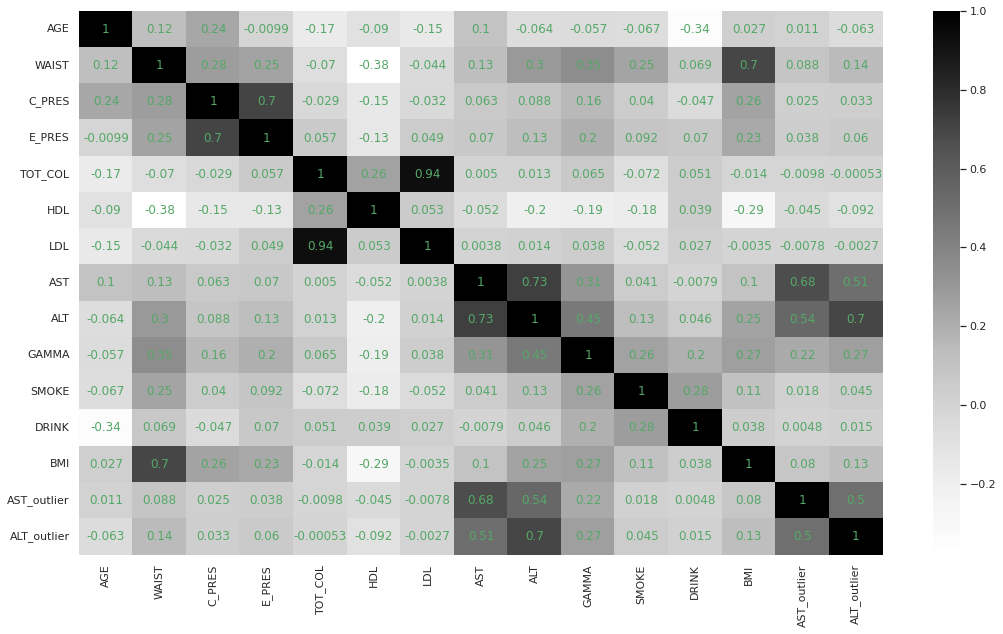

In [57]:
corr_df = df_trim.corr()
ax = sns.heatmap(corr_df,annot=True,annot_kws = dict(color='g'), cmap='Greys' )
sns.set(rc = {'figure.figsize':(10,10)})

plt.show()

*위의 heatmap을 통해 항목들 사이의 상관관계를 분석하였다*.

-  E_PRES와 C_PRES, WAIST와 BMI 가 0.7의 상관관계를 가지고 있으며, TOT_COL과 LDL이 0.94의 상관관계를, AST와 ALT가 0.73의 높은 상관관계를 가지고 있음을 확인할 수 있다.

- 이 외에도 AST와 GAMMA가 0.31,ALT와 GAMMA가 0.45로 주목할 만한 상관관계를 가지고 있음을 확인할 수 있다.

- 이외에도 ALT와 WAIST는 0.26의 상관도, C_PRES와 WAIST는 0.28의 상관도,C_PRES와 BMI는 0.25의 상관도, TOT_COL과 HDL은 0.24의 상관도를, SMOKE와 WAIST는 0.26의 상관도를, SMOKE와 DRINK는 0.3의 상관도를 보이고 있음을 확인가능하므로 이 항목들을 중점적으로 어떤 관계를 가지는 지 알아보려고 한다.



> E_PRES : 검진자의 최저 혈압
 C_PRES : 검진자의 최고 혈압
  TOT_COL :  혈청 중의 에스텔형, 비에스테형 콜레스테롤의 합
> 
> LDL : LDL(저밀도 리포단백질)에 함유된 콜레스테롤
>
>AST : 간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌 , 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함
>
>ALT : 간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가함
>
> GAMMA : 간 기능을 나타내는 혈액검사상의 수치, 간 내의 쓸개관(담관)에 존재하는 효소로 글루타민산을 외부에 펩티드나 아미노산 등으로 옮기는 작용을 함, 쓸개즙(담즙) 배설 장애, 간세포 장애 발생 시 혈중에 증가하게 됨


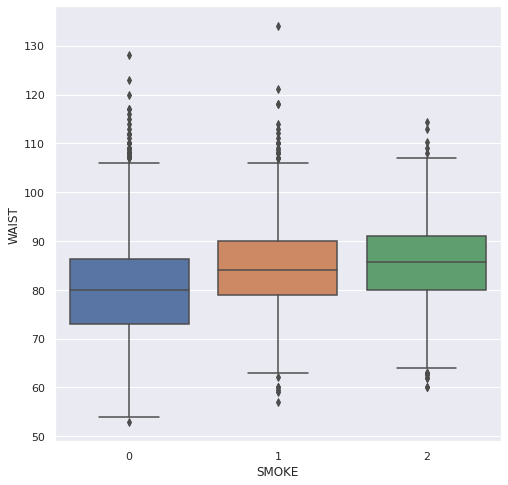

In [60]:
sns.boxplot(x = 'SMOKE',y = 'WAIST', data = df_trim)
sns.set(rc = {'figure.figsize':(5,5)})

plt.show()

###💡
0.26의 상관도를 가지는 SMOKE와 WAIST사이에서 위의 boxplot을 통해서 **현재 흡연자들과 이전에 흡연자였던 사람들이 비흡연자들에 비해 허리둘레가 더 큼을 확인할 수 있으며, 비흡연자들의 허리둘레 폭이 더 크다**

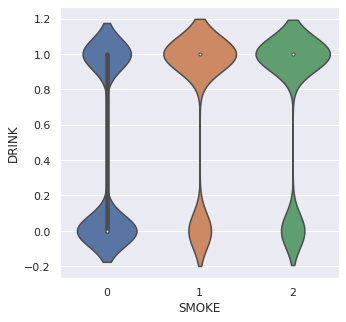

In [61]:
sns.violinplot(x = 'SMOKE',y = 'DRINK', data = df_trim)
plt.show()

###💡 
위의 시각화결과를 통해 비흡연자들 중에는 술을 마시는 사람들과 술을 마지 않는 사람들의 비율이 대체로 비슷한 반면, 흡연자이거나 과거에 흡연자였던 그룹에서는 술을 마시는 사람들의 비율이 마시지 않는 사람들에 비해 월등히 많음을 확인할 수 있다.

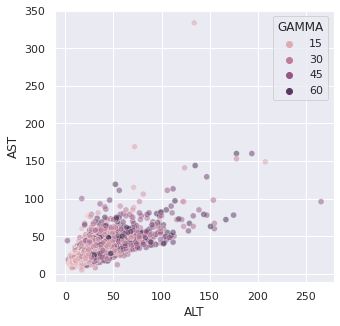

In [66]:
sns.scatterplot(x = 'ALT',y = 'AST', hue = 'GAMMA', alpha = 0.5, data = df_trim)
plt.show()

위의 산점도 그래프를 보면, ALT가 높아질 수록 큰 GAMMA 값의 분포가 많아짐을 확인할 수 있다.

ALT와 AST에 따른 GAMMA를 비교하는 경우, ALT와 AST가 모두 100 이상일 때 ALT를 나타나는 가로축으로 높은 GAMMA값의 산점도가 퍼져있는 것을 확인할 수 있다.

ALT가 50이상 150이하이고 AST가 50이상 100 이하 일때 높은 GAMMA값을 나타내는 지표들이 많이 나타나며, GAMMA값들이 세로보다 가로로 더 분포되어 있다는 사실로 보아 GAMMA 값은 ALT와 비례관계 증가하며 AST값보다 ALT 값의 영향을 더 많이 받는다는 사실을 다시한번 확인할 수 있다.


**즉, 쓸개즙(담즙) 배설 장애, 간세포 장애가 발생한 경우, 이는 간 세포 내의 효소의 영향을 받아 문제가 생겼을 가능성이 크다는 점을 감안하여 간 효소에 이상이 있는지 우선적으로 살펴야 한다.**

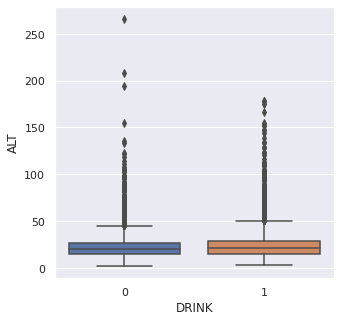

In [75]:
sns.boxplot(x = 'DRINK',y = 'ALT', data = df_trim)
sns.set(rc = {'figure.figsize':(5,5)})

plt.show()

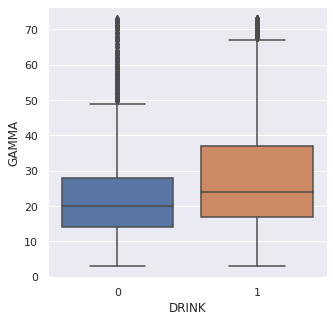

In [79]:
sns.boxplot(x = 'DRINK',y = 'GAMMA', data = df_trim)
sns.set(rc = {'figure.figsize':(5,5)})

plt.show()

###💡 
boxplot으로 음주여부와 ALT, GAMMA간에 상관관계가 있는지 확인한 결과 음주와 ALT는 크게 관계가 없지만, GAMMA와 음주여부사이에는 어느정도의 관계가 있는 것으로 보인다. 

즉, 음주는 간 세포 내의 효소에 영향을 미쳐 GAMMA_GTP에 영향을 준다고 보기 어려우며 영향이 있다면 ALT와 음주는 독립적으로 영향을 끼친다고 볼 수 있다.

HEATMAP 결과와 함께 고려할 경우, GAMMA_GTP와 음주의 상관성은 0.2로 GAMMA_GTP와 ALT 의 상관성 0.45의 절반보다 낮음을 알 수 있다. 

**따라서 음주는 GAMMA_GTP에 거의 영향을 미치지 못하며 음주와 ALT는 거의 상관이 없다고 보아도 무방하다.**


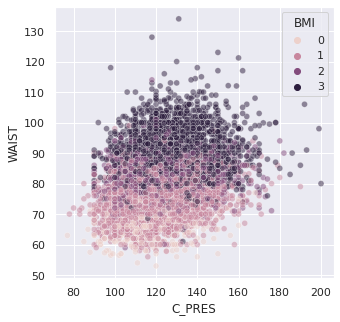

In [96]:
sns.scatterplot(x = 'C_PRES',y = 'WAIST', hue = 'BMI', alpha = 0.5, data = df_trim)
#C_PRES와 WAIST는 0.28의 상관도,C_PRES와 BMI는 0.25의 상관도, 

HEATMAP에 의해 C_PRES와 WAIST는 0.28의 상관도,C_PRES와 BMI는 0.25의 상관도를 가짐을 알아냈으므로, C_PRES와 WAIST, C_PRES와 BMI가 어떤 관계를 가지는지 그리고 WAIST와 BMI가 상관관계가 있는지를 유추하기 위해 위의 산점도 그래프를 사용하였다.

- 위의 산점도 그래프를 통해 BMI가 위의 방향으로 그라데이션으로 진해지는 것을 통해 WAIST값이 클 수록 OVERFAT(고도비만)을 나타내는 BMI 지표 매퍼들이 많아지고, WAIST값이 작아질 수록 LOW(저체중)을 나타내는 BMI지표 매퍼들이 많아지는 것을 확인하는 것을 통해 WAIST와 BMI사이에 관계성이 있음을 확인할 수 있다.

- 전체적인 점들의 분포가 우상향하는 형태를 띄는 것을 통해 C_PRES가 증가할 수록 WAIST값이 증가하는 양상을 띄는 것을 확인할 수 있다.

- C_PRES값이 커질수록 진한 BMI지표들이 아래까지 분포하고 연한 색의 BMI지표들이 줄어드는 것으로 보아 , C_PRES의 값과 BMI또한 linear하게 함께 증감하는 것을 확인할 수 있다.

- **따라서, 혈압과 허리둘레, BMI지수는 서로 밀접한 관계를 가지며 세 지표들 모두 linear하게 증가하는 관계성을 가지고 있음을 파악할 수 있다.** 

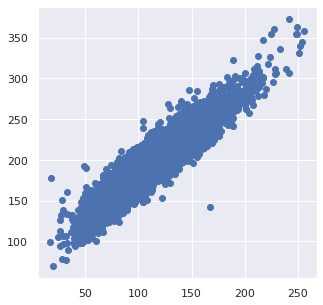

In [103]:
plt.plot(df_trim['LDL'], df_trim['TOT_COL'],'o')

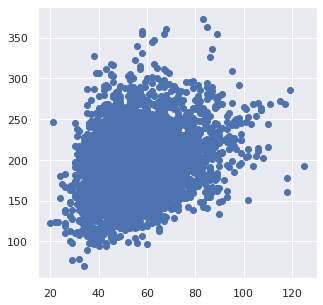

In [102]:
plt.plot(df_trim['HDL'], df_trim['TOT_COL'],'o')

HDL과 LDL모두 리포 단백질에 포함되는 콜레스테롤이지만, 위의 시각화 결과를 통해 총 콜레스테롤에 미치는 영향에는 큰 차이가 있음을 알 수 있다.

- 저밀도 리포 단백질에 포함되는 콜레스테롤인 LDL콜레스테롤이 체네의 총 콜레스테롤과 linear한 관계를 가지며 LDL콜레스테롤은 과하게 증가할 경우 혈관벽을 막는 몸에 해로운 성분인 만큼, **체내의 총 콜레스테롤을 줄이기 위해서는 LDL콜레스테롤이 함유된 음식 섭취를 지양해야한다는 사실을 발견할 수 있다.**
 
